In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf



In [3]:
start='2012-01-01'
end='2022-12-21'
stock='TALK'
data=yf.download(stock,start,end)








YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
data


Price,Close,High,Low,Open,Volume
Ticker,TALK,TALK,TALK,TALK,TALK
Date,,,,,
2020-07-30,10.100,10.100,9.800,10.000,225600
2020-07-31,9.800,9.900,9.800,9.900,52700
2020-08-03,10.840,10.840,10.840,10.840,300
2020-08-04,9.850,10.100,9.800,10.100,53300
2020-08-05,9.850,10.224,9.850,10.224,1900
...,...,...,...,...,...
2022-12-14,0.707,0.777,0.702,0.730,344000
2022-12-15,0.770,0.802,0.690,0.690,577500


In [7]:
data.reset_index(inplace=True)

In [9]:
data


Price,Date,Close,High,Low,Open,Volume
Ticker,,TALK,TALK,TALK,TALK,TALK
0,2020-07-30,10.100,10.100,9.800,10.000,225600
1,2020-07-31,9.800,9.900,9.800,9.900,52700
2,2020-08-03,10.840,10.840,10.840,10.840,300
3,2020-08-04,9.850,10.100,9.800,10.100,53300
4,2020-08-05,9.850,10.224,9.850,10.224,1900
...,...,...,...,...,...,...
599,2022-12-14,0.707,0.777,0.702,0.730,344000
600,2022-12-15,0.770,0.802,0.690,0.690,577500
601,2022-12-16,0.855,0.887,0.775,0.775,1040700


In [13]:
ma_100_days=data.Close.rolling(100).mean()

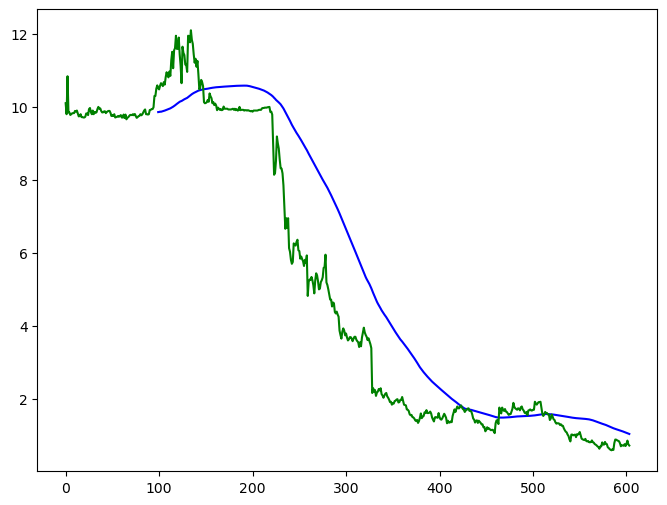

In [15]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'b')
plt.plot(data.Close,'g')
plt.show()


In [17]:
ma_200_days=data.Close.rolling(200).mean()


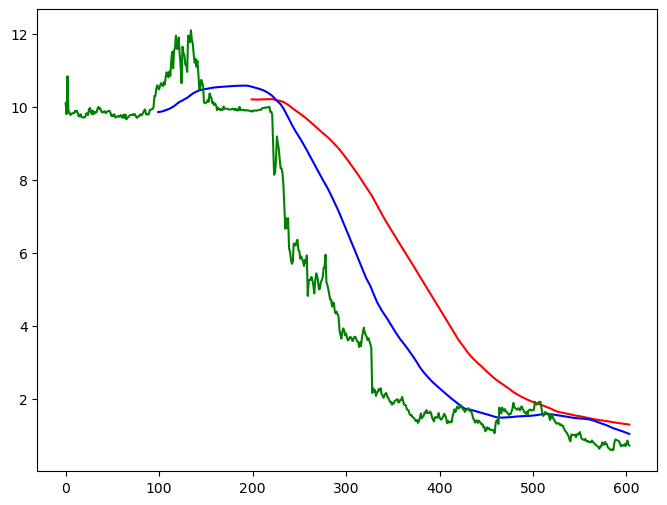

In [19]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,'r')
plt.plot(ma_100_days,'b')
plt.plot(data.Close,'g')
plt.show()


In [21]:
data.dropna(inplace=True)

In [23]:

data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [25]:
data_train.shape[0]

483

In [27]:

data_test.shape[0]

121

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [31]:
data_train_scale=scaler.fit_transform(data_train)

In [35]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
	
	

In [37]:
x,y=np.array(x),np.array(y)
	

In [39]:
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential


In [43]:

model=Sequential()
model.add(LSTM(units=50 , activation= 'relu', return_sequences=True,
                input_shape= ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60 , activation= 'relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [45]:

model.compile(optimizer='adam' ,loss='mean_squared_error')

In [47]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 258ms/step - loss: 0.1850
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 238ms/step - loss: 0.0418
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - loss: 0.0214
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - loss: 0.0185
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - loss: 0.0161
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - loss: 0.0157
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - loss: 0.0135
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - loss: 0.0098
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - loss: 0.0132
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - loss: 0.0101
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - loss: 0.0100
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - loss: 0.0111
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - loss: 0.0126
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - loss: 0.0115
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step - l

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [51]:
pas_100_days=data_train.tail(100)


In [53]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)


In [55]:
data_test_scale=scaler.fit_transform(data_test)


In [67]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)
	
	
	

In [69]:

	
	y_predict=model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step


In [71]:
scale=1/scaler.scale_

In [73]:
y_predict=y_predict*scale


In [75]:
y=y*scale


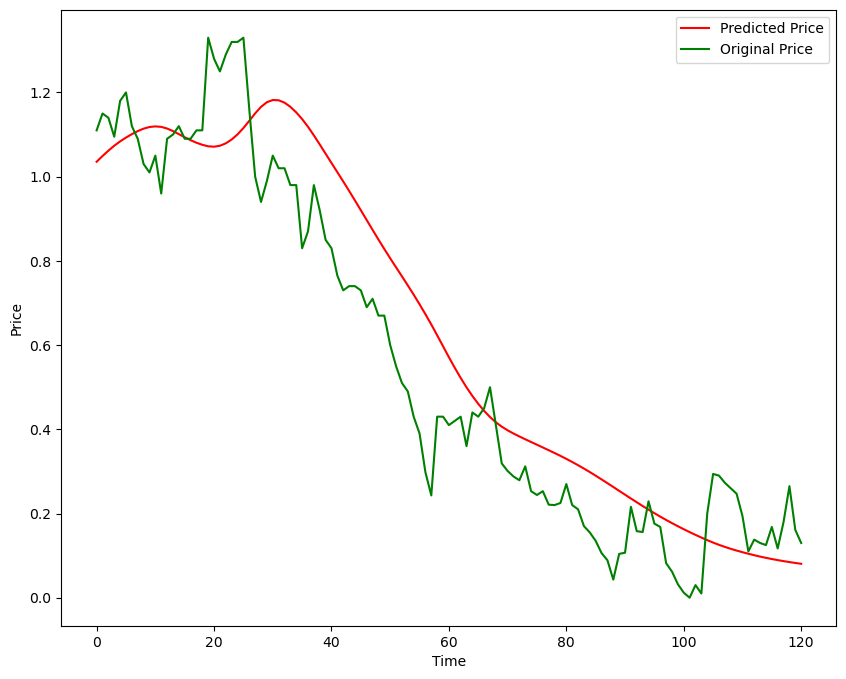

In [77]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()







In [79]:
model.save('SPP.h5')